# Assignment 8: Moving Beyond Linearity

Dataset(s) needed:
Hitters data frame of the ISLR library SF-DAT-21. In this assignment, we're going to predict Salary based on Hits as the only independent variable.

In [95]:
import pandas as pd

train = pd.read_csv('Hitters.csv')
train.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


<h3> Q.1. Replace missing values in the dataset by the mean</h3>

In [96]:
for k in train.keys():
    if train[k].isna().sum() > 0:
        train[k].fillna(train[k].mean(), inplace=True)

<h3> Q.2. Graph a scatter plot to visualize the relationship between Hits and Salary</h3>

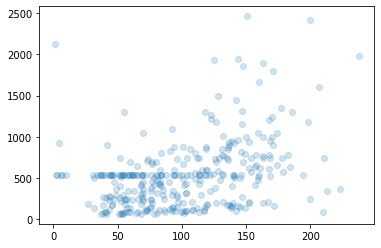

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=train['Hits'], y=train['Salary'], alpha=0.2)
plt.show()

<h3> Q.3. Apply Linear Regression on the Hitters data to predict 'Salary' depending only on 'Hits' as the independent variable. Print out the slope and intercept coefficients.
</h3>

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# TODO: Split the data into 70/30 train/test datasets
# X = np.array(train["Hits"]).reshape((-1, 1))
X = train["Hits"]
y = train["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TODO: Fit linear regression model
lin_model = LinearRegression()
x = X_train.values.reshape(-1, 1)
lin_model.fit(x, y_train)

# TODO: print the slope and intercept
print("Slope:", lin_model.coef_)
print("Intercept:", lin_model.intercept_)

Slope: [2.67265151]
Intercept: 258.3617421213528


<h3> Q.4. Compute the RMSE of the model obtained above</h3>

In [116]:
from sklearn.metrics import mean_squared_error
from math import sqrt

test_x = X_test.values.reshape(-1, 1)
y_pred = lin_model.predict(test_x)
rmse = sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print(rmse)

414.4855851467615


<h3> Q.5. Graph the linear regression model obtained on the data</h3>

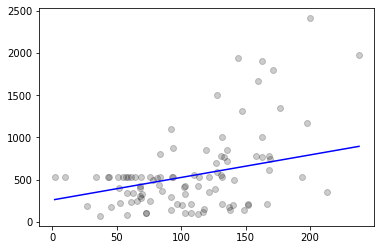

In [106]:
# TODO: Plot outputs
linear_regr = np.linspace(test_x.min(),test_x.max())
linear_regr = linear_regr.reshape(-1,1)
plot = lin_model.predict(linear_regr)

plt.scatter(x=test_x, y=y_test, color='black', alpha=0.2)
plt.plot(linear_regr, plot, color='blue')
plt.show()

<h3> Q.6. Construct a polynomial regression model with degree 2 to predict 'Salary' depending only on 'Hits' as the independent variable. Compute the RMSE and Plot your result.
</h3>

[ 2.06714107e-02 -1.68855257e+00  4.43517426e+02]
397.58138241995215


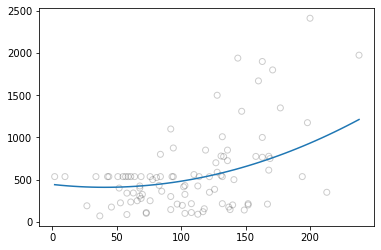

In [112]:
import numpy as np

# Generate weights for polynomial function with degree 2
weights = np.polyfit(x=X_train, y=y_train, deg=2)
print(weights)

# # Generate model with the given weights
poly_model = np.poly1d(weights)

# # Prediction on test set
y_pred = poly_model(test_x)

# # TODO: Compute the RMSE
rms = sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
print(rms)
#
# # TODO: Plot the visualisation
poly_regr = np.linspace(test_x.min(),test_x.max())
plot = poly_model(poly_regr)

plt.scatter(test_x, y_test, facecolor='None', edgecolor='k', alpha=0.2)
plt.plot(poly_regr, plot)
plt.show()

<h3> Q.7. Create a cubic spline with 3 knots at 40, 100 and 150</h3>

422.75737635016094


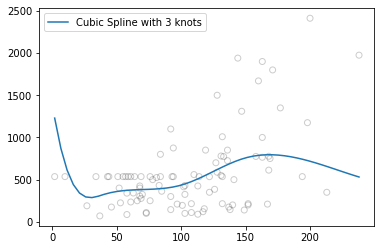

In [114]:
from patsy import dmatrix
import statsmodels.api as sm

# Generate a cubic spline with 3 knots at 25, 40 and 60 # FYI-- using what the above question mentioned
transformed_x = dmatrix("bs(train, knots=(40,100,150), degree=3, include_intercept=False)", {"train": X_train},return_type='dataframe')#TODO

# Fit a generalized linear models on the transformed dataset
y_train = np.array(y_train)
fit_glm = sm.GLM(y_train, transformed_x).fit() #TODO
#
# # Prediction
pred_glm = fit_glm.predict(dmatrix("bs(valid, knots=(40,100,150), include_intercept=False)", {"valid": test_x}, return_type='dataframe')) #TODO
#
# # TODO: Compute the RMSE
rms = sqrt(mean_squared_error(y_test, pred_glm))
print(rms)
#
# # TODO: Plot the visualisation
lin = np.linspace(test_x.min(),test_x.max())
pred_glm = fit_glm.predict(dmatrix("bs(xp, knots=(40,100,150), include_intercept=False)", {"xp": lin}, return_type='dataframe'))


plt.scatter(test_x, y_test, facecolor='None', edgecolor='k', alpha=0.2)
plt.plot(lin, pred_glm, label='Cubic Spline with 3 knots')
plt.legend()
plt.show()

<h3> Q.8. Create a natural cubic spline on the data to predict 'Salary' based on 'Hits'</h3>

405.97323602820336


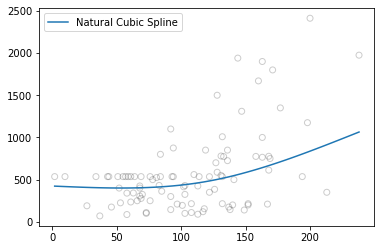

In [113]:
# Generate natural cubic spline
transformed_x = dmatrix("cr(train,df = 3)", {"train": X_train}, return_type='dataframe')
fit_spline = sm.GLM(y_train, transformed_x).fit() # TODO

# TODO: Compute the RMSE 
pred_spline = fit_spline.predict(dmatrix("cr(valid, df=3)", {"valid": test_x}, return_type='dataframe'))
rms = sqrt(mean_squared_error(y_true=y_test, y_pred=pred_spline))
print(rms)

# Visualization
lin = np.linspace(test_x.min(),test_x.max())
pred_spline = fit_spline.predict(dmatrix("cr(xp, df=3)", {"xp": lin}, return_type='dataframe'))

plt.scatter(test_x, y_test, facecolor='None', edgecolor='k', alpha=0.2)
plt.plot(lin, pred_spline, label='Natural Cubic Spline')
plt.legend()
plt.show()

<h3> Q.9. Which model performed the best?</h3>

In [ ]:
# #1 -- 2nd degree polynomial: 397.58138241995215
# #2 -- Natural spline: 405.97323602820336
# #3 -- Normal Linear Regr Model: 414.4855851467615
# #4 -- Cubic spline: 422.75737635016094
# It appears that the 2nd degree polynomial performed best due to its lowest RMSE score


<h3><h3> Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [ ]:
# Enter summary here
# I had no experience with any of the models except the polynomial and what we learned in class on lin regr.
# I had a few issues with reshaping the data as some of these functions required the data to be prepared a
# specific way, but I feel like I am slowly getting better with shaping the data and understanding the importance.
# Some of the notes on the knots were conflicting (comments mentioned "3 knots at 25, 40 and 60 " while the
# question actually said something different. I ran both simulations and saw that the question's knots of 40,100,150
# were better, so I stuck with those. I can also see how people could get carried away with polynomial degrees and
# overfitting models with high variance.